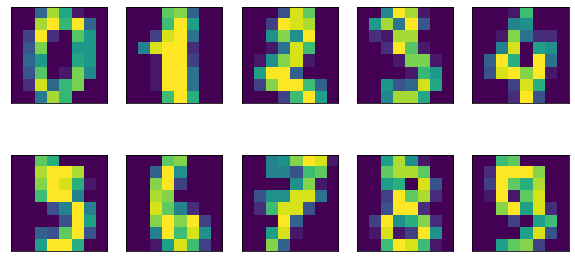

In [3]:
from sklearn.datasets import load_digits
import matplotlib.pyplot as plt
digits = load_digits()
fig, axes = plt.subplots(2,5, figsize=(10,5), subplot_kw={'xticks':(), 'yticks':()})
for ax, img in zip(axes.ravel(), digits.images):
    ax.imshow(img)

Text(0, 0.5, 'Second PCA')

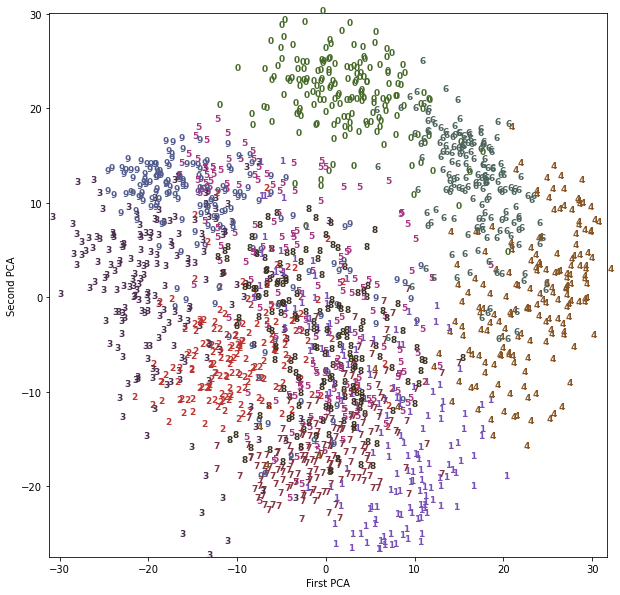

In [7]:
#build a PCA model
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
pca.fit(digits.data)
#transform the digits data onto the first two principal components
digits_pca = pca.transform(digits.data)
colors = ["#476A2A","#7851B8", "#BD3430", "#4A2D4E","#875525","#A83683","#4E655E","#853541", "#3A3120", "#535D8E"]
plt.figure(figsize=(10,10))
plt.xlim(digits_pca[:,0].min(), digits_pca[:,0].max())
plt.ylim(digits_pca[:,1].min(), digits_pca[:,1].max())
for i in range(len(digits.data)):
    #actually plot the digits as text instead of using scatterplot
    plt.text(digits_pca[i,0], digits_pca[i, 1], str(digits.target[i]), color=colors[digits.target[i]], fontdict={'weight':'bold','size':9})
plt.xlabel("First PCA")
plt.ylabel("Second PCA")
    

In [ ]:
'''The digits zero, six, and four are relatively well seperated using the 1st PCA thought they overlap'''
'''Lets apply t-SNE to the same dataset and compare the outcome. As t-SNE does not support transforming new data, the TSNE class
has no transform method. Instead we call the fit_transfomr method which will build the model and immediately return transformed
data'''

Text(0, 0.5, 't-SNE feature 1')

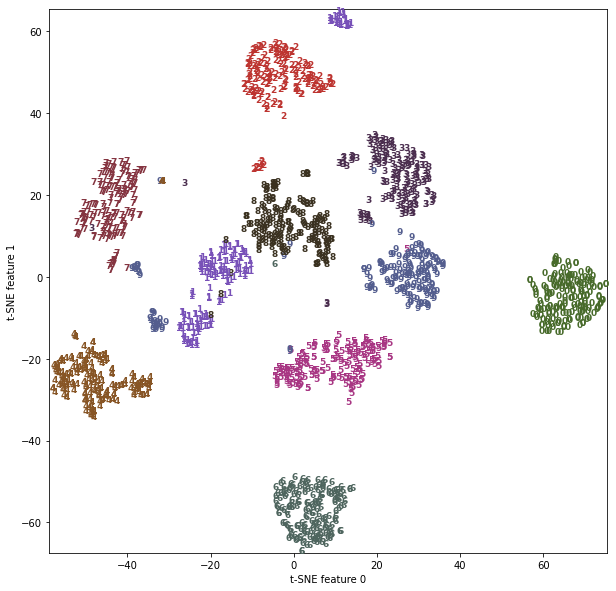

In [10]:
from sklearn.manifold import TSNE
tsne = TSNE(random_state=42)
#use fit_transform instead of fit, as TSNE has no transform method
digits_tsne= tsne.fit_transform(digits.data)
plt.figure(figsize=(10,10))
plt.xlim(digits_tsne[:,0].min(), digits_tsne[:,0].max()+1)
plt.ylim(digits_tsne[:,1].min(), digits_tsne[:,1].max()+1)
for i in range(len(digits.data)):
    #actually plot the digits as text instead of using scatterplot
    plt.text(digits_tsne[i,0], digits_tsne[i, 1], str(digits.target[i]), color=colors[digits.target[i]], fontdict={'weight':'bold','size':9})
plt.xlabel("t-SNE feature 0")
plt.ylabel("t-SNE feature 1")

In [ ]:
'''
1. Results of t-SNE are quite remarkable. All the classes are quite clearly separated.
2. The ones and nines are somewhat split up, but most of the classes form a single dense group.
3. Although the method has no knowlegde of the class label it is completely unsupervised. still it can find a representation
of the data in 2D that clearly separate the classes, based on how close points are in the original space.
'''
#T-SNE has few tuning parameters, though it works well with the default setting,(perplexity and early_exaggeration)